In [27]:
from pycocotools.coco import COCO # COCO python library
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

import random
import string

import os

import json

from tqdm.notebook import tqdm

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [28]:
coco=COCO("../COCO_caption/annotations/instances_train2014.json")

loading annotations into memory...
Done (t=12.00s)
creating index...
index created!


In [29]:
cats = coco.loadCats(coco.getCatIds())
maincategories = list(set([cat['supercategory'] for cat in cats]))
subcategories = [cat['name'] for cat in cats]
print("Number of sub categories: ", len(subcategories))
print("List of sub categories: ", subcategories)

Number of sub categories:  80
List of sub categories:  ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [30]:
subcategories_imageIds = dict()
catIds = coco.getCatIds(catNms=subcategories)

for i in range(0,len(catIds)):
    imgIds = coco.getImgIds(catIds=catIds[i])
    img = []
    for j in imgIds: 
        img.append(j)
    subcategories_imageIds[subcategories[i]] = img

In [31]:
# choose the subcategories
train_cats = subcategories_imageIds['person']
imgIdss = coco.getImgIds(imgIds = train_cats)
print("Total Images: ", len(imgIdss))

Total Images:  45174


In [32]:
next_pix = imgIdss
random.shuffle(next_pix)

In [33]:
coco_caps=COCO("../COCO_caption/annotations/captions_train2014.json")

loading annotations into memory...
Done (t=0.71s)
creating index...
index created!


In [34]:
# 用于存储结果的列表
output_data = []

# 遍历图片ID列表，提取信息
for img_id in next_pix:
    # 加载图片元数据
    img_metadata = coco.loadImgs(img_id)[0]
    img_info = {
        'id': img_metadata['id'],
        'file_name': img_metadata['file_name'],
        'url': img_metadata['coco_url'],
        'captions': []
    }
    
    # 获取与该图片相关的caption注释ID
    ann_ids = coco_caps.getAnnIds(imgIds=img_metadata['id'])
    
    # 加载所有caption注释
    anns = coco_caps.loadAnns(ann_ids)
    for ann in anns:
        img_info['captions'].append(ann['caption'])  # 提取caption文本
    
    # 将图片信息添加到输出列表
    output_data.append(img_info)
    sample_output_data = output_data[:100]

In [35]:
with open('car_data.json', 'w', encoding='utf-8') as f:
    json.dump(sample_output_data, f, ensure_ascii=False, indent=4)

A young girl about to bite into a hotdog dotted with mustard and ketchup
A girl makes a face as she eats a hot dog.
A little girl is attempting to eat a hot dog.
THERE IS A GIRL THAT IS EATING A HOT DOG 
A girl getting ready to bite into a hotdog 


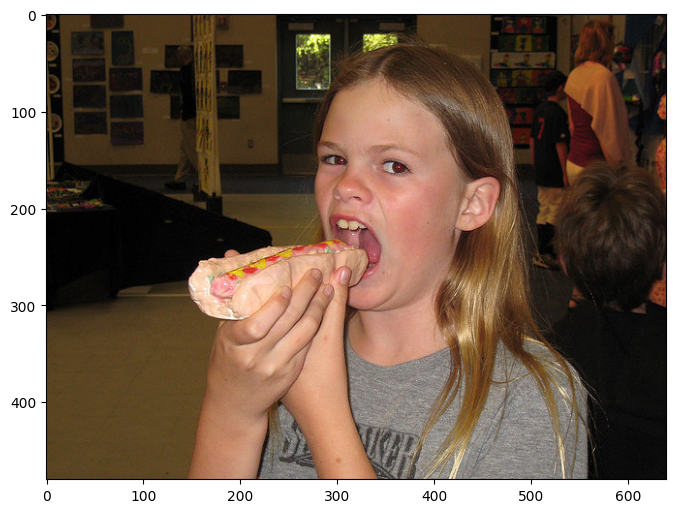

In [36]:
img = coco.loadImgs(next_pix[1])[0]
I = io.imread(img['coco_url'])
plt.imshow(I)
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.show()